In [40]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('dataframes/totalMetricsStatsPerformSmallerIts.pkl', 'rb') as f:
    statsPerformMetrics = pickle.load(f)
with open('dataframes/totalMetricsSkillCornerSmallerIts.pkl', 'rb') as f:
    skillCornerMetrics = pickle.load(f)

In [66]:
print(statsPerformMetrics[statsPerformMetrics['name'] == 'Kade'])
skillCornerMetrics.columns = ['name', 'iterations', 'maxSpeed', 'distanceCovered', 'maximumSpeedSustained', 'sprintCount']
skillCornerMetrics = skillCornerMetrics[['name', 'iterations', 'maxSpeed', 'maximumSpeedSustained', 'sprintCount', 'distanceCovered' ]]
print(skillCornerMetrics[skillCornerMetrics['name'] == 'Kade'])


    name  iterations  maxSpeed  maximumSpeedSustained  sprintCount  \
56  Kade           0  9.247037                    840           16   
57  Kade           2  9.244167                    840           16   
58  Kade           5  9.237980                    840           16   
59  Kade          10  9.230853                    840           16   
60  Kade          25  9.210093                    840           16   
61  Kade          30  9.203002                    840           16   
62  Kade          40  9.188683                    840           15   
63  Kade          50  9.174243                    840           16   

    distanceCovered  
56      6498.637744  
57      6498.700627  
58      6498.614401  
59      6498.486379  
60      6498.117636  
61      6498.000066  
62      6497.755540  
63      6497.501592  
    name  iterations  maxSpeed  maximumSpeedSustained  sprintCount  \
56  Kade           0  9.101897                    800           16   
57  Kade           2  9.073907 

In [67]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 4, 4, 2])
print(
    (np.sqrt((x-y)**2)).sum()
)

4.0


In [70]:
# Takes as input two np.float arrays corresponding to one metric for each player array x for SkillCorner and y for StatsPerform respectively 
def computeRMSE(x, y): 
    assert len(x) == len(y)
    rmse = np.sqrt(((x-y)**2).sum()/x.size)
    return rmse

In [73]:
print(len(skillCornerMetrics['name'].unique()))

14


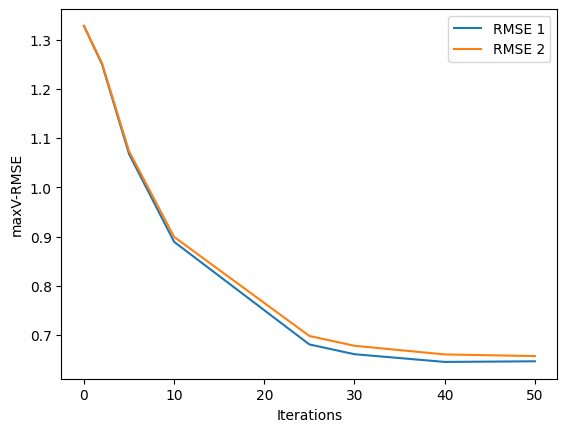

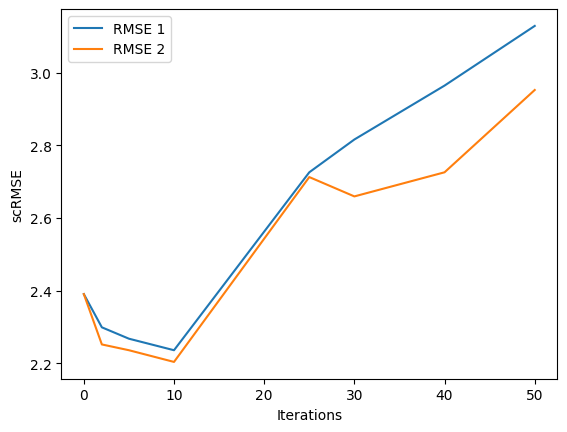

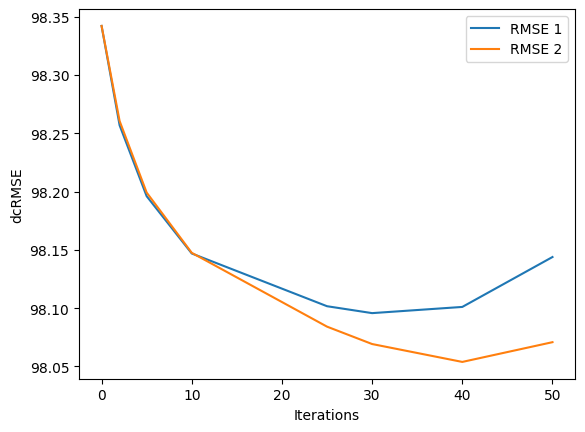

In [79]:
maxV_RMSE_to_OG = []
maxV_RMSE = []
for it in skillCornerMetrics['iterations'].unique():
    x1 = np.array([skillCornerMetrics[skillCornerMetrics['iterations'] == it]['maxSpeed']])
    y1 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == it]['maxSpeed']])
    y2 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == 0]['maxSpeed']])
    maxV_RMSE_to_OG.append(computeRMSE(x1, y2))
    maxV_RMSE.append(computeRMSE(x1, y1))

plt.plot(skillCornerMetrics['iterations'].unique(), maxV_RMSE_to_OG, label='RMSE 1')
plt.plot(skillCornerMetrics['iterations'].unique(), maxV_RMSE, label='RMSE 2')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('maxV-RMSE')
plt.show()

sc_RMSE_to_OG = []
sc_RMSE = []
for it in skillCornerMetrics['iterations'].unique():
    x1 = np.array([skillCornerMetrics[skillCornerMetrics['iterations'] == it]['sprintCount']])
    y1 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == it]['sprintCount']])
    y2 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == 0]['sprintCount']])
    sc_RMSE_to_OG.append(computeRMSE(x1, y2))
    sc_RMSE.append(computeRMSE(x1, y1))

plt.plot(skillCornerMetrics['iterations'].unique(), sc_RMSE_to_OG, label='RMSE 1')
plt.plot(skillCornerMetrics['iterations'].unique(), sc_RMSE, label='RMSE 2')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('scRMSE')
plt.show()

dc_RMSE_to_OG = []
dc_RMSE = []
for it in skillCornerMetrics['iterations'].unique():
    x1 = np.array([skillCornerMetrics[skillCornerMetrics['iterations'] == it]['distanceCovered']])
    y1 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == it]['distanceCovered']])
    y2 = np.array([statsPerformMetrics[statsPerformMetrics['iterations'] == 0]['distanceCovered']])
    dc_RMSE_to_OG.append(computeRMSE(x1, y2))
    dc_RMSE.append(computeRMSE(x1, y1))

plt.plot(skillCornerMetrics['iterations'].unique(), dc_RMSE_to_OG, label='RMSE 1')
plt.plot(skillCornerMetrics['iterations'].unique(), dc_RMSE, label='RMSE 2')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('dcRMSE')
plt.show()

In [83]:
print(1 - maxV_RMSE_to_OG[2]/maxV_RMSE[0])

0.19587357003393568
